<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [46]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [47]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\larry\OneDrive\Documents\GitHub\lab-unsupervised-learning-en\your-code


In [48]:
# loading the data: Wholesale customers data

# Load the dataset into a pandas DataFrame
file_path = '../data/Wholesale customers data.csv'
wholesale_data = pd.read_csv(file_path) #pd. is pandas module and need to be imported to run

In [28]:
# Display basic statistical summary
print(wholesale_data.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [49]:
# Step 1: Understand the dataset

# Display data types and unique values for each column
print(wholesale_data.dtypes)
print(wholesale_data.nunique())

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object
Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64


In [30]:
# Display the first few rows of the dataset to understand its structure
print(wholesale_data.head())

# Summary information about the dataset, including data types and missing values
print(wholesale_data.info())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

In [50]:
# Step 2: Analyze categorical columns
# Analyze the distribution of the 'Channel' column
print(wholesale_data['Channel'].value_counts())

# Analyze the distribution of the 'Region' column
print(wholesale_data['Region'].value_counts())

Channel
1    298
2    142
Name: count, dtype: int64
Region
3    316
1     77
2     47
Name: count, dtype: int64


In [51]:
# Step 3: Check for missing data
# Display the count of missing values in each column
print(wholesale_data.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


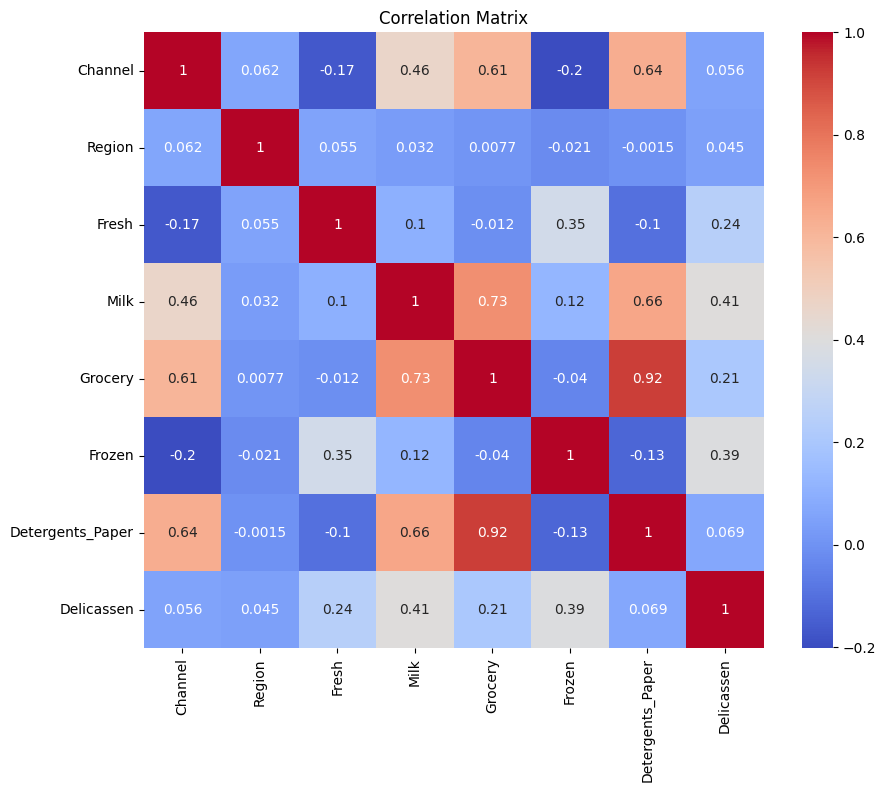

In [52]:
# Step 4: Analyze collinearity between columns
# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

correlation = wholesale_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

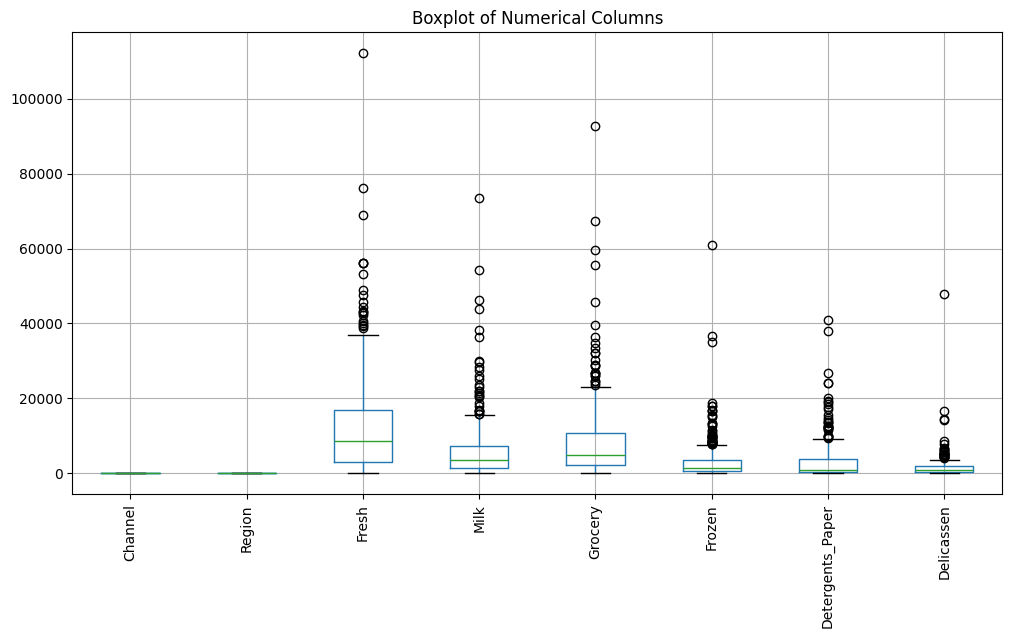

In [53]:
# Step 5: Analyze descriptive statistics and detect outliers
# Use boxplot to identify potential outliers in numerical columns
wholesale_data.boxplot(figsize=(12, 6), rot=90)
plt.title("Boxplot of Numerical Columns")
plt.show()

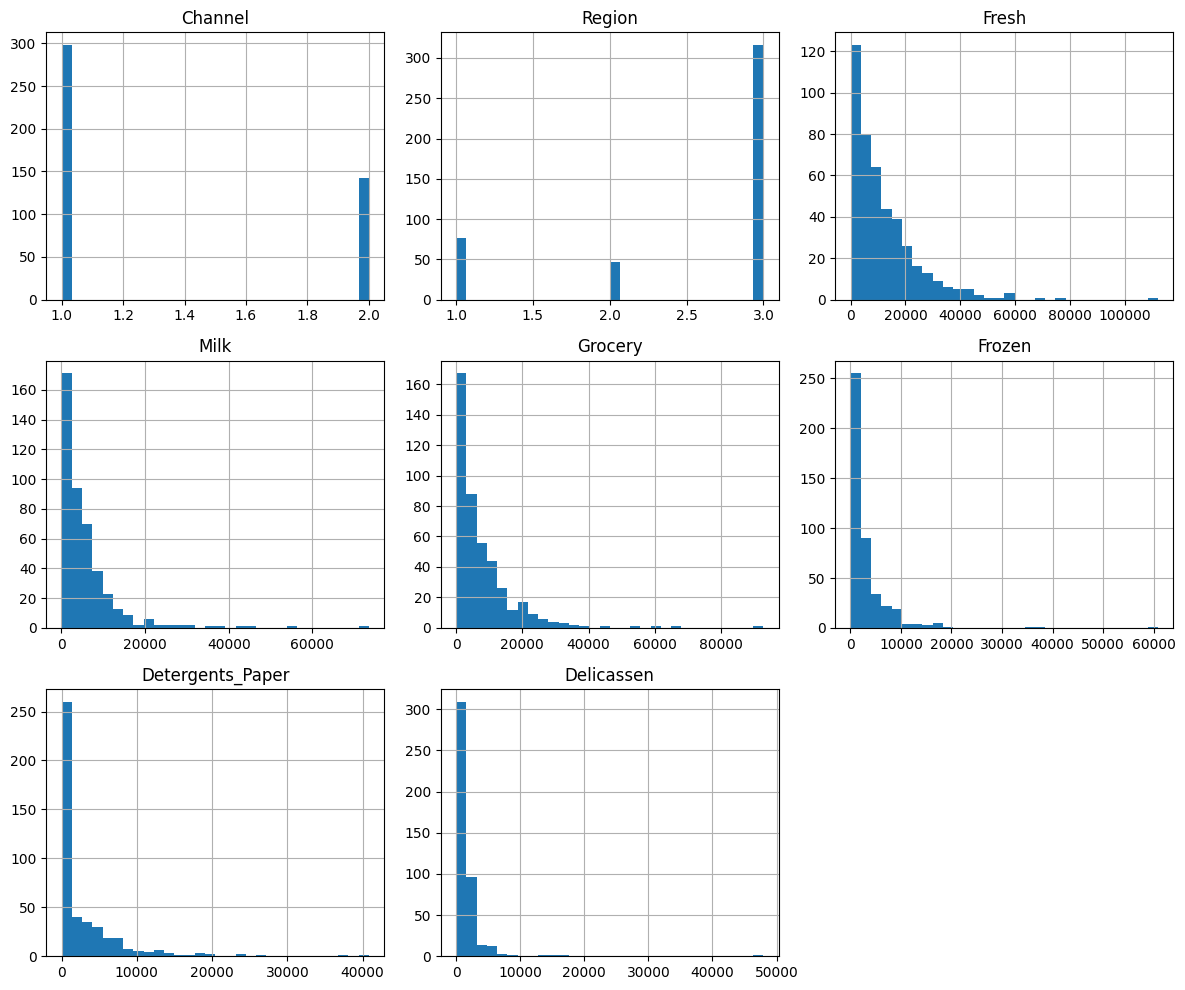

In [54]:
# Step 6: Check the distribution of data in each column
# Plot histograms for each numerical column to see their distributions
wholesale_data.hist(bins=30, figsize=(12, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

In [55]:
# Step 7: Pareto principle analysis (80/20 rule)
# Calculate the total sales for each customer
wholesale_data['Total_Sales'] = wholesale_data.iloc[:, 2:].sum(axis=1)

# Sort the dataset by total sales in descending order
pareto_data = wholesale_data.sort_values(by='Total_Sales', ascending=False)

# Calculate cumulative percentage of total sales
pareto_data['Cumulative_Percentage'] = pareto_data['Total_Sales'].cumsum() / pareto_data['Total_Sales'].sum() * 100

# Check if 20% of customers generate 80% of the total sales
top_20_percent = pareto_data.head(int(len(pareto_data) * 0.2))
print("Maximum cumulative percentage for top 20% customers:", top_20_percent['Cumulative_Percentage'].max())

Maximum cumulative percentage for top 20% customers: 42.90483942679298


**Your observations here**

1. Channel and Region as categorical variables: Although these columns are represented as int64, they are categorical in nature. The Channel column likely represents different sales channels (e.g., Horeca or Retail), and the Region column encodes geographical regions. These numbers do not have a numerical meaning but rather act as labels for categories. This distinction is crucial, as these columns should be treated differently during analysis or transformation (e.g., one-hot encoding instead of scaling).

2. Column meanings and distributions:
- Channel and Region are categorical columns with 2 and 3 unique values, respectively.
- Columns such as Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicassen represent various product categories, all with significant variation in their values (as seen in the histograms and descriptive statistics).

3. Missing data:
- No missing values were detected in any column, ensuring data completeness.

4. Correlations:
- High correlation between Grocery and Detergents_Paper (0.92) and between Milk and Grocery (0.73). This indicates possible collinearity.
- Low or negligible correlations between other product categories.

5. Outliers:
- Boxplots reveal the presence of significant outliers in all numerical columns, especially in Fresh, Milk, and Grocery.

6. Skewed distributions:
- Histograms show that most columns are heavily right-skewed, with the majority of the data concentrated in lower ranges.

7. Pareto principle (80/20 rule):
- The top 20% of customers account for approximately 42.9% of total sales, which does not strictly follow the Pareto principle (80/20).

**Insights:**

- The skewness indicates that the data is not evenly distributed and may require transformations (e.g., logarithmic scaling) to reduce skewness for better analysis and model performance.
- The presence of outliers suggests the need for further investigation to determine if these values represent exceptional cases or errors.
- The histograms highlight differences in customer behavior, such as small purchases for certain categories, which could be useful for customer segmentation.


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [56]:
# Your code here

#Step 1: Handle Outliers (Optional)

# Remove outliers using the IQR method
Q1 = wholesale_data.quantile(0.25)
Q3 = wholesale_data.quantile(0.75)
IQR = Q3 - Q1

# Define bounds to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to exclude outliers
cleaned_data = wholesale_data[~((wholesale_data < lower_bound) | (wholesale_data > upper_bound)).any(axis=1)]

print(f"Original dataset size: {wholesale_data.shape[0]}")
print(f"Cleaned dataset size: {cleaned_data.shape[0]}")

Original dataset size: 440
Cleaned dataset size: 332


In [57]:
# Step 2: Encode Categorical Columns

encoded_data = pd.get_dummies(cleaned_data, columns=['Channel', 'Region'], drop_first=True)

print("Categorical columns have been encoded:")
print(encoded_data.head())

Categorical columns have been encoded:
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Total_Sales  \
0  12669  9656     7561     214              2674        1338        34112   
1   7057  9810     9568    1762              3293        1776        33266   
3  13265  1196     4221    6404               507        1788        27381   
5   9413  8259     5126     666              1795        1451        26710   
6  12126  3199     6975     480              3140         545        26465   

   Channel_2  Region_2  Region_3  
0       True     False      True  
1       True     False      True  
3      False     False      True  
5       True     False      True  
6       True     False      True  


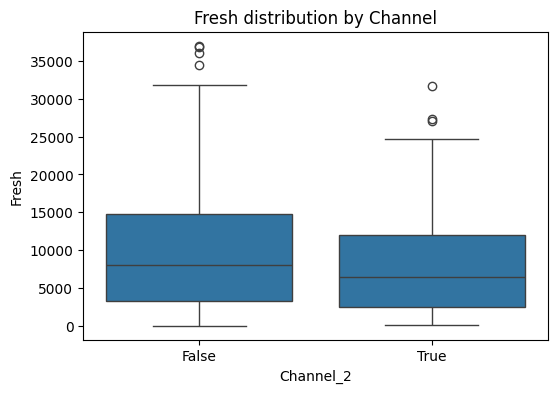

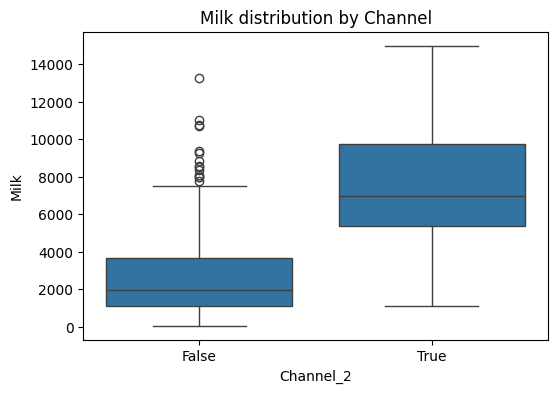

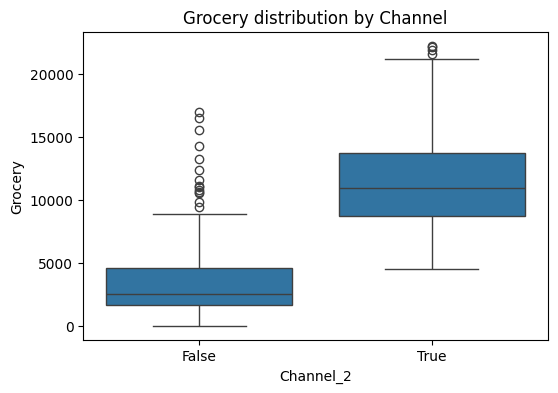

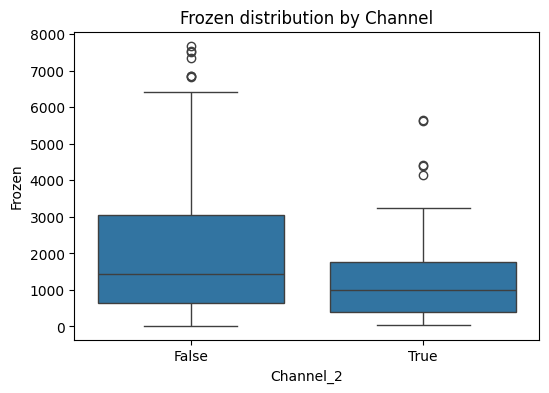

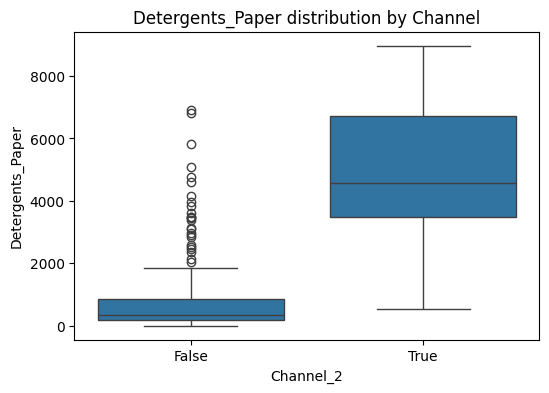

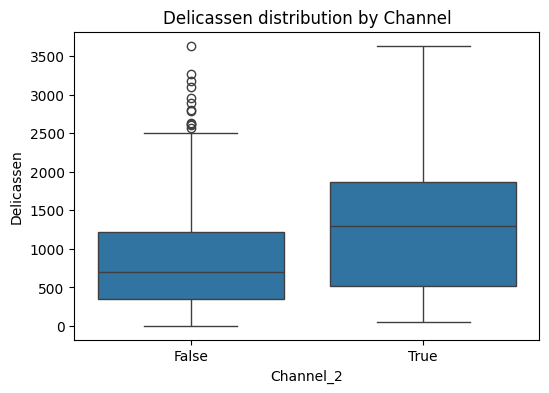

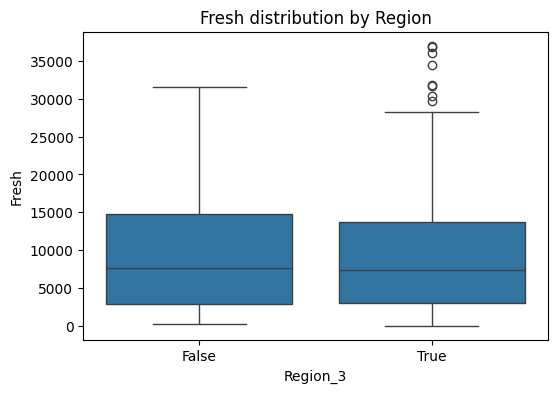

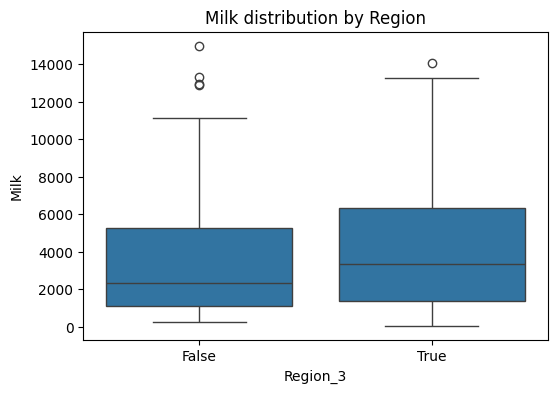

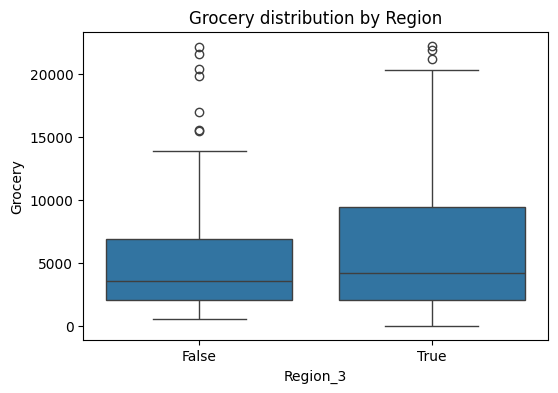

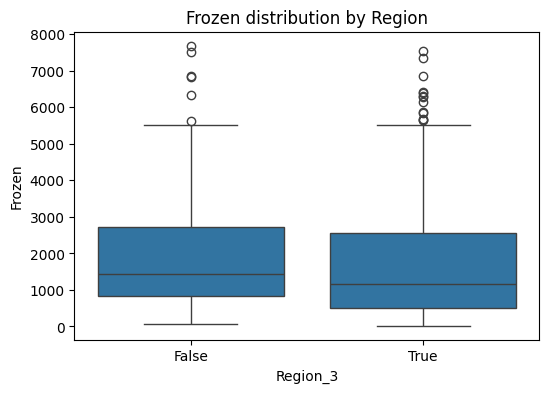

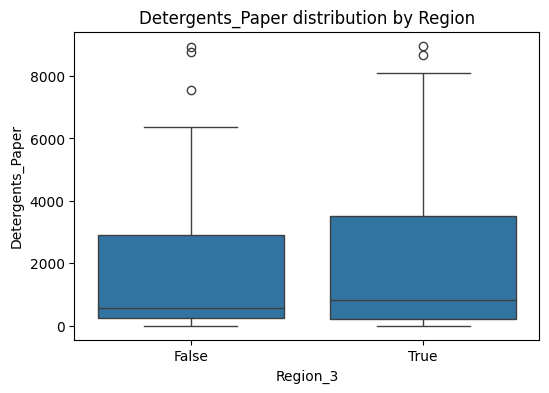

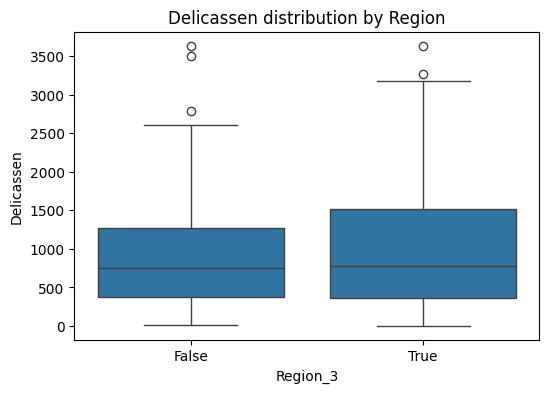

In [58]:
#Evaluation for Categoricaal features inclusion into Clustering process

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Channel vs numerical columns
for col in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=encoded_data['Channel_2'], y=encoded_data[col])
    plt.title(f'{col} distribution by Channel')
    plt.show()

# Boxplot for Region vs numerical columns
for col in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=encoded_data['Region_3'], y=encoded_data[col])
    plt.title(f'{col} distribution by Region')
    plt.show()

**Your comment here**

1. Outlier Handling:
- The original dataset contained 440 rows, and after removing outliers using the IQR method, 332 rows remain.
- This indicates that 108 rows (approximately 24.5% of the data) were identified as containing outliers and excluded from the cleaned dataset.
- Removing these outliers ensures that extreme values do not skew the analysis or clustering results in subsequent steps.

2. Categorical Encoding:
- The categorical columns Channel and Region were successfully encoded using one-hot encoding.
- Two new columns were created: Channel_2 and Region_3, representing the encoded categories while dropping the first category as the baseline (to prevent multicollinearity).
- The dataset now includes these additional columns, which are ready for further analysis or machine learning.

3. Cleaned Dataset Structure:
- The cleaned dataset retains the structure of the original numerical columns (Fresh, Milk, Grocery, etc.) while adding the newly encoded columns (Channel_2, Region_2, Region_3).
- This provides a well-prepared dataset for subsequent preprocessing and clustering tasks.

**Conclusion:**
The cleaning and transformation steps effectively addressed outliers and prepared the categorical variables for analysis. The dataset is now more consistent and ready for preprocessing.


**Evaluation Summary for categorical features inclusion in the Clustering process**

1. Observations on Channel:
-  Significant differences were observed in numerical columns like Milk, Grocery, and Detergents_Paper based on the Channel (Channel_2).
-  These differences suggest that the distribution channel plays a meaningful role in customer purchasing behavior for certain product categories.

2. Observations on Region:
-  The differences in numerical columns based on Region (Region_3) were less pronounced.
-  While there are slight variations in columns like Frozen and Milk, most numerical columns showed similar patterns across regions.

3. Decision for Clustering:
-  Include Channel: The observed differences justify including Channel as a feature in the clustering process to improve segmentation based on distribution channels.
-  Exclude Region: Since Region does not show significant variation in the data, it will be excluded to reduce dimensionality and avoid introducing unnecessary noise into the clustering process.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [59]:
# Your import here:
from sklearn.preprocessing import StandardScaler

# Step 1: Select numerical columns for scaling
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Apply StandardScaler to numerical columns
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(encoded_data[numerical_columns])

# Convert scaled numerical data back to a DataFrame
customers_scale = pd.DataFrame(scaled_numerical_data, columns=numerical_columns)

# Step 2: Include 'Channel' and exclude 'Region'
# Add 'Channel_2' to the dataset
#customers_scale = pd.concat([scaled_numerical_df, encoded_data[['Channel_2']]], axis=1)

print("Final dataset prepared for clustering:")
print(customers_scale.head())

Final dataset prepared for clustering:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.383041  1.652898  0.334978 -0.967004          0.305053    0.390465
1 -0.305588  1.698756  0.733878 -0.059255          0.569139    0.922591
2  0.456174 -0.866283 -0.328862  2.662821         -0.619462    0.937169
3 -0.016491  1.236906 -0.148989 -0.701951         -0.069958    0.527749
4  0.316411 -0.269838  0.218508 -0.811022          0.503864   -0.572949


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [60]:
from sklearn.cluster import KMeans

# Your code here:

# Step 1: Initialize the K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters if necessary

# Step 2: Fit the model to the prepared data
kmeans.fit(customers_scale)

# Step 3: Assign the cluster labels to the dataset
customers_scale['Cluster'] = kmeans.labels_

print("Cluster labels assigned to each record:")
print(customers_scale.head())

Cluster labels assigned to each record:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0  0.383041  1.652898  0.334978 -0.967004          0.305053    0.390465   
1 -0.305588  1.698756  0.733878 -0.059255          0.569139    0.922591   
2  0.456174 -0.866283 -0.328862  2.662821         -0.619462    0.937169   
3 -0.016491  1.236906 -0.148989 -0.701951         -0.069958    0.527749   
4  0.316411 -0.269838  0.218508 -0.811022          0.503864   -0.572949   

   Cluster  
0        0  
1        0  
2        2  
3        0  
4        1  


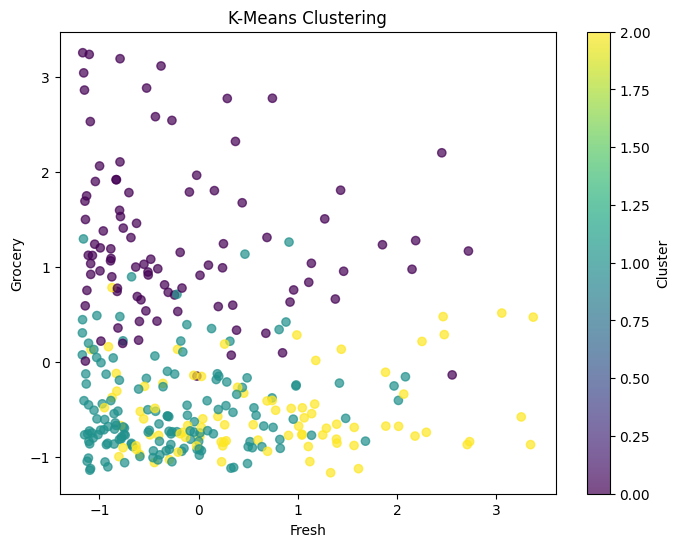

In [61]:
import matplotlib.pyplot as plt

# Example scatter plot of two features with cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(customers_scale['Fresh'], customers_scale['Grocery'], c=customers_scale['Cluster'], cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering")
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.colorbar(label="Cluster")
plt.show()

### Looking to the elbow we can choose 2 like the correct number of clusters

In [65]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale) # Step 1: Initialize K-Means with 2 clusters and Fit the model

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [66]:
customers_scale['Label'] = clusters

Count the values in `labels`.

In [67]:
# Your code here:

# Count the number of records in each cluster
label_counts = customers_scale['Label'].value_counts()
print("Number of records in each cluster:")
print(label_counts)

Number of records in each cluster:
Label
0    236
1     96
Name: count, dtype: int64


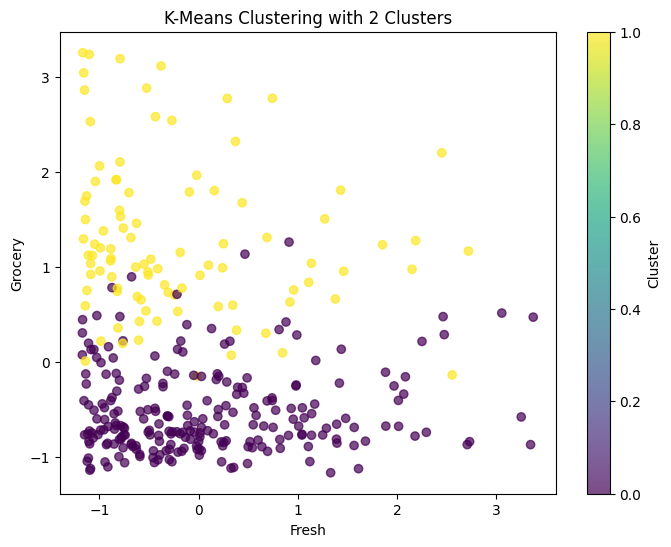

In [68]:
import matplotlib.pyplot as plt

# Scatter plot for visualization
plt.figure(figsize=(8, 6))
plt.scatter(customers_scale['Fresh'], customers_scale['Grocery'], c=customers_scale['Label'], cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering with 2 Clusters")
plt.xlabel("Fresh")
plt.ylabel("Grocery")
plt.colorbar(label="Cluster")
plt.show()

In [69]:
#Clusters Stats details

cluster_stats = customers_scale.groupby('Label').mean()
print("Cluster statistics:")
print(cluster_stats)

Cluster statistics:
          Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
Label                                                                         
0      0.081676 -0.474544 -0.518838  0.148674         -0.513487   -0.228916   
1     -0.200788  1.166587  1.275477 -0.365491          1.262321    0.562753   

        Cluster  
Label            
0      1.372881  
1      0.010417  


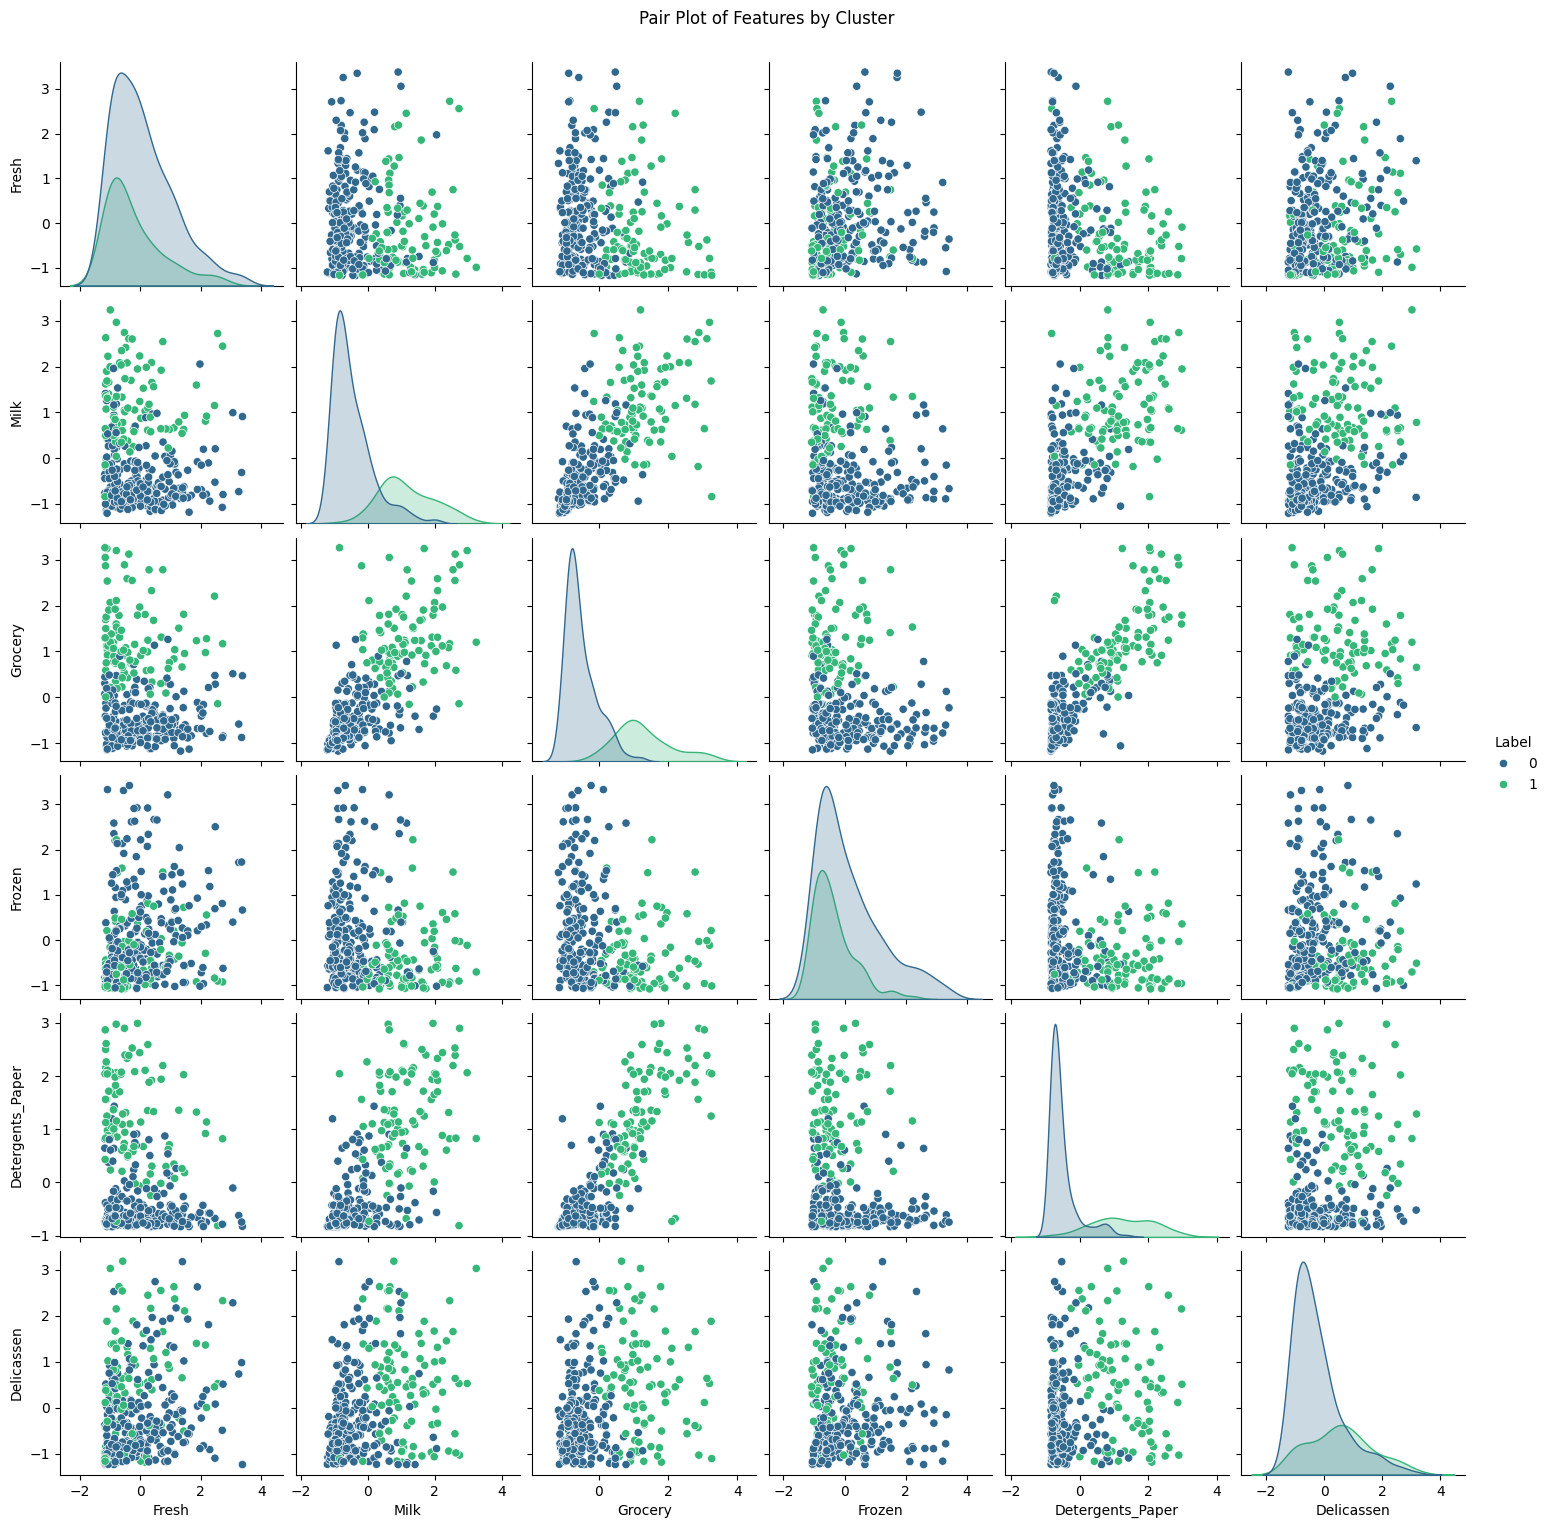

In [70]:
#Displaying all columns with pairs of scatter plots

import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot of all numerical columns with cluster labels
sns.pairplot(customers_scale, vars=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], 
             hue='Label', palette='viridis', diag_kind='kde')
plt.suptitle("Pair Plot of Features by Cluster", y=1.02)
plt.show()

C:\Users\larry\AppData\Local\Temp\ipykernel_14848\272679631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=col, data=customers_scale, palette='viridis')


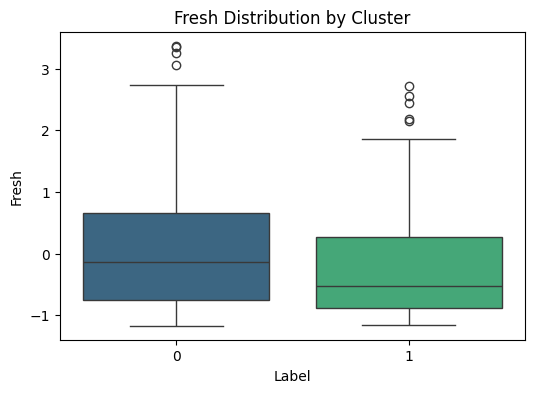

C:\Users\larry\AppData\Local\Temp\ipykernel_14848\272679631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=col, data=customers_scale, palette='viridis')


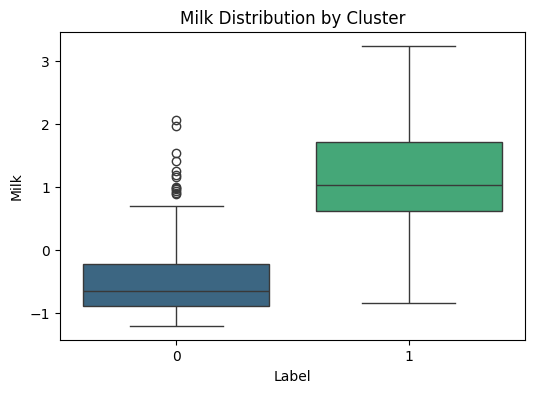

C:\Users\larry\AppData\Local\Temp\ipykernel_14848\272679631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=col, data=customers_scale, palette='viridis')


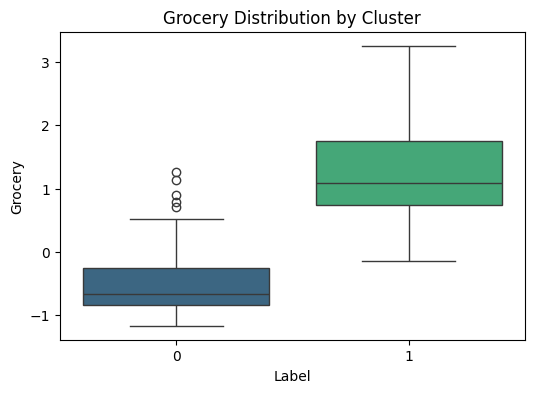

C:\Users\larry\AppData\Local\Temp\ipykernel_14848\272679631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=col, data=customers_scale, palette='viridis')


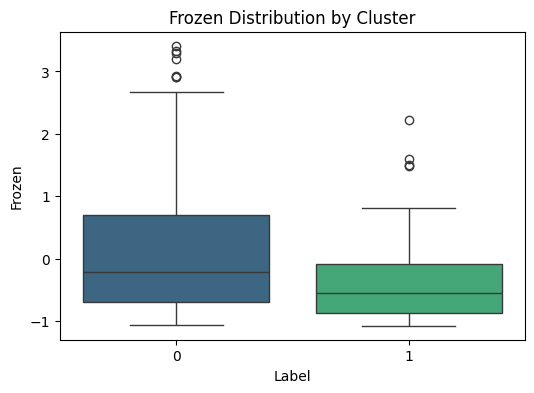

C:\Users\larry\AppData\Local\Temp\ipykernel_14848\272679631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=col, data=customers_scale, palette='viridis')


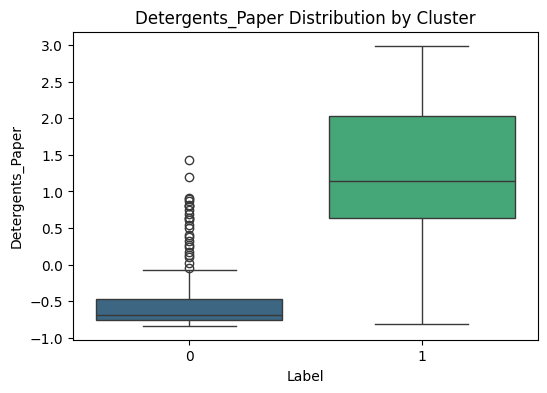

C:\Users\larry\AppData\Local\Temp\ipykernel_14848\272679631.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y=col, data=customers_scale, palette='viridis')


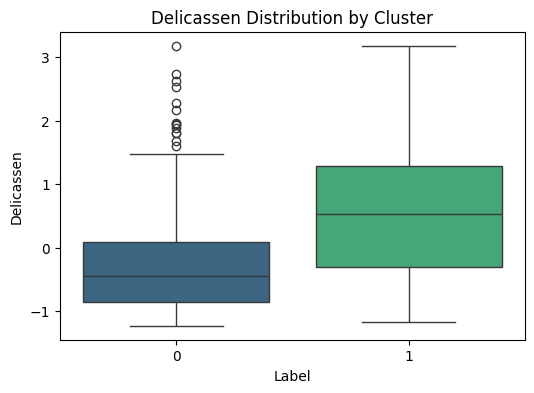

In [71]:
#Boxplots for each column grouped by cluster

# Boxplots for each numerical column grouped by clusters
for col in ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Label', y=col, data=customers_scale, palette='viridis')
    plt.title(f'{col} Distribution by Cluster')
    plt.show()

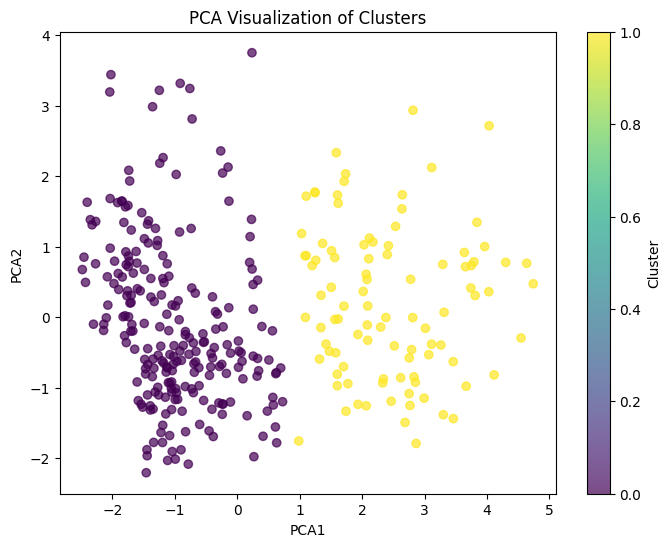

In [72]:
#Dimensionality reduction (optional)
# If you want a global visualization of the data in multiple dimensions, you can apply techniques such as 
# PCA (Principal Component Analysis) or t-SNE to reduce the dimensions to 2D or 3D and then visualize the clusters.

from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(customers_scale.drop(columns=['Label']))
customers_scale['PCA1'] = pca_result[:, 0]
customers_scale['PCA2'] = pca_result[:, 1]

# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
plt.scatter(customers_scale['PCA1'], customers_scale['PCA2'], c=customers_scale['Label'], cmap='viridis', alpha=0.7)
plt.title("PCA Visualization of Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster")
plt.show()

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [90]:
from sklearn.cluster import DBSCAN 

# Your code here

# Step 1: Initialize the DBSCAN model with eps=0.5
dbscan = DBSCAN(eps=0.5)  # Adjust min_samples if needed

# Step 2: Fit the model to the scaled dataset
dbscan_labels = dbscan.fit_predict(customers_scale)

# Step 3: Assign DBSCAN labels to the dataset
customers_scale['labels_DBSCAN'] = dbscan_labels

Count the values in `labels_DBSCAN`.

In [91]:
# Your code here

#Count the number of points in each cluster
dbscan_counts = customers_scale['labels_DBSCAN'].value_counts()
print("DBSCAN Cluster Counts:")
print(dbscan_counts)

DBSCAN Cluster Counts:
labels_DBSCAN
-1    305
 0     18
 1      9
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [92]:
'''
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();
'''

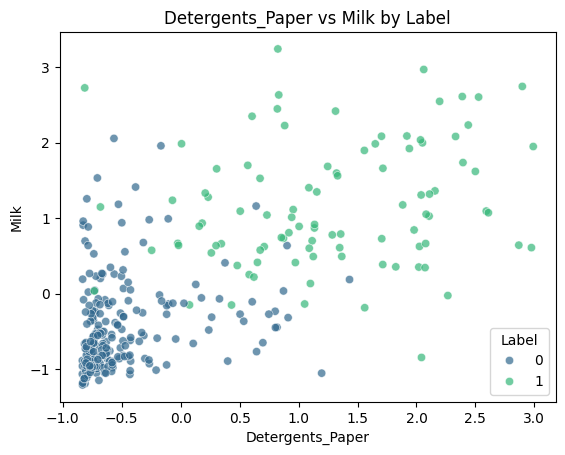

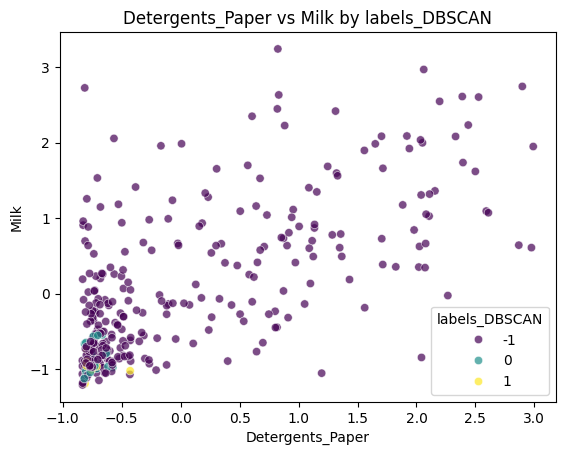

In [ ]:
# Your code here:
# corrected function
def plot(x, y, hue, data):
    sns.scatterplot(x=x, y=y, hue=hue, data=data, palette="viridis", alpha=0.7)
    plt.title(f'{x} vs {y} by {hue}')
    plt.show()

# Visualization
plot('Detergents_Paper', 'Milk', 'Label', customers_scale)  # For K-Means
plot('Detergents_Paper', 'Milk', 'labels_DBSCAN', customers_scale)  # For DBSCAN



Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

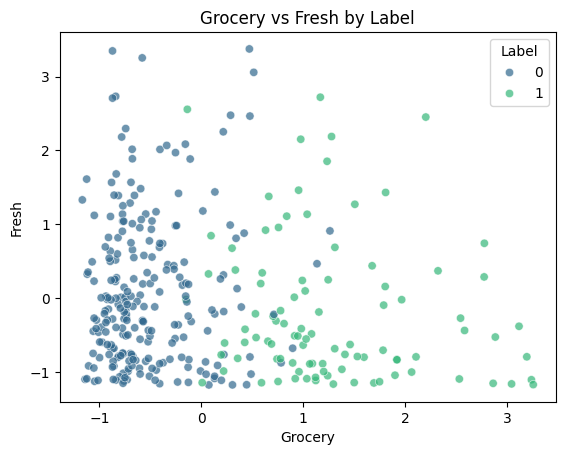

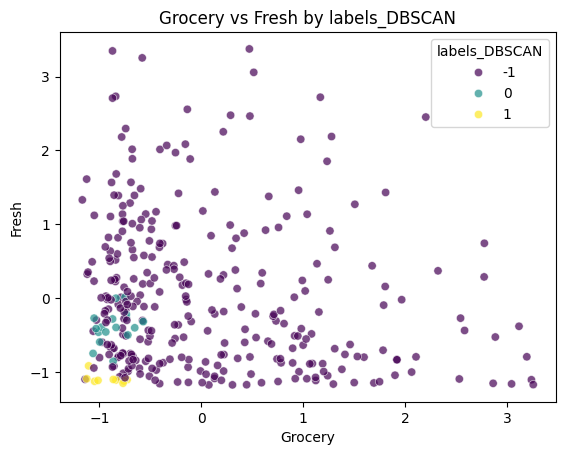

In [95]:
# Your code here:

plot('Grocery', 'Fresh', 'Label', customers_scale)  # For K-Means
plot('Grocery', 'Fresh', 'labels_DBSCAN', customers_scale)  # For DBSCAN

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

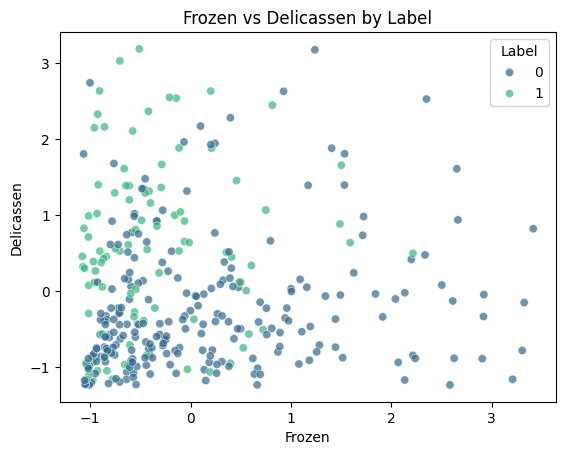

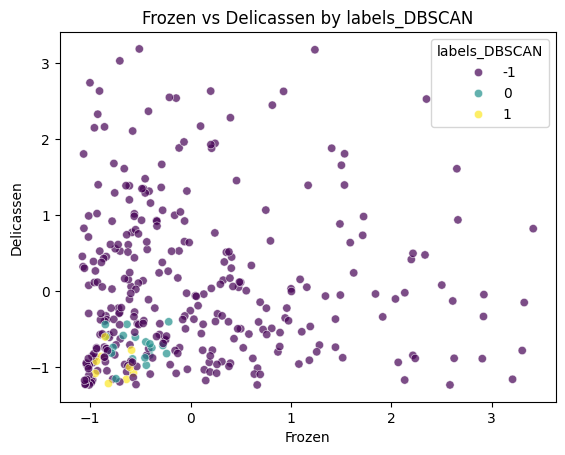

In [96]:
# Your code here:

plot('Frozen', 'Delicassen', 'Label', customers_scale)  # For K-Means
plot('Frozen', 'Delicassen', 'labels_DBSCAN', customers_scale)  # For DBSCAN

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [97]:
# Your code here:
# Group by K-Means labels and calculate the mean
kmeans_means = customers_scale.groupby('Label').mean()
print("Means by K-Means clusters:")
print(kmeans_means)

# Group by DBSCAN labels and calculate the mean
dbscan_means = customers_scale.groupby('labels_DBSCAN').mean()
print("\nMeans by DBSCAN clusters:")
print(dbscan_means)

Means by K-Means clusters:
          Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
Label                                                                         
0      0.081676 -0.474544 -0.518838  0.148674         -0.513487   -0.228916   
1     -0.200788  1.166587  1.275477 -0.365491          1.262321    0.562753   

        Cluster      PCA1      PCA2  labels_DBSCAN  
Label                                               
0      1.372881 -0.991600 -0.085262      -0.847458  
1      0.010417  2.437683  0.209604      -1.000000  

Means by DBSCAN clusters:
                  Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
labels_DBSCAN                                                             
-1             0.054515  0.080057  0.076879  0.054199          0.065396   
 0            -0.379225 -0.858805 -0.844751 -0.538247         -0.734818   
 1            -1.088987 -0.995418 -0.915828 -0.760265         -0.746551   

               Delicassen   Cluster     L

Which algorithm appears to perform better?

**Your observations here**

DBSCAN appears to perform better for this dataset. Here’s why:

- Handling Outliers: DBSCAN effectively separates noise (-1) from the main clusters, which helps in preserving the integrity of the meaningful clusters. K-Means, on the other hand, incorporates outliers into the nearest clusters, potentially distorting their characteristics.

- Cluster Shape and Density: DBSCAN excels with non-spherical and irregularly shaped clusters, as shown by the variability in means across clusters. K-Means assumes spherical clusters, which can lead to inaccuracies in datasets with irregular patterns.

- Noise Representation: The inclusion of a -1 cluster by DBSCAN provides a clear distinction for points that do not belong to any dense cluster, making it more suitable for noisy datasets.

- Cluster Means: DBSCAN clusters exhibit distinct means across features, suggesting that it effectively captured different group patterns without being influenced by outliers.

However, if the dataset primarily contains spherical clusters with minimal noise, K-Means may still be more efficient due to its simplicity and faster computation. For this specific dataset, DBSCAN's ability to handle noise and irregular cluster shapes makes it the better-performing algorithm.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

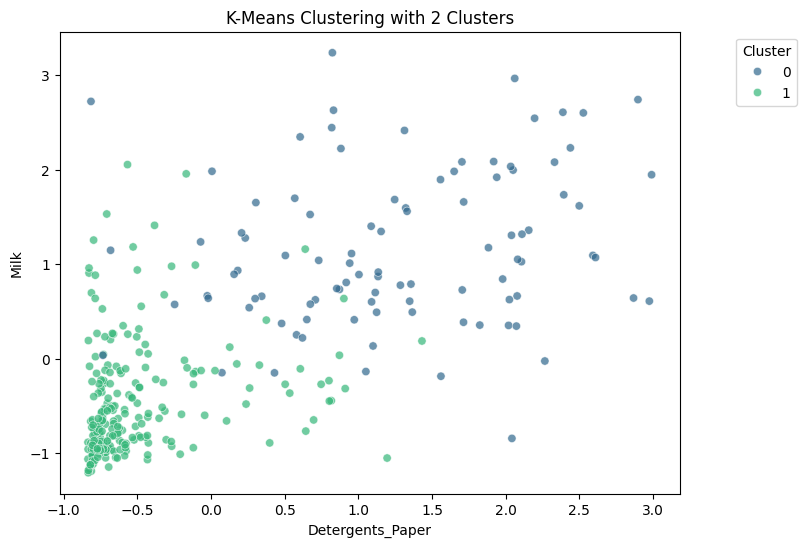

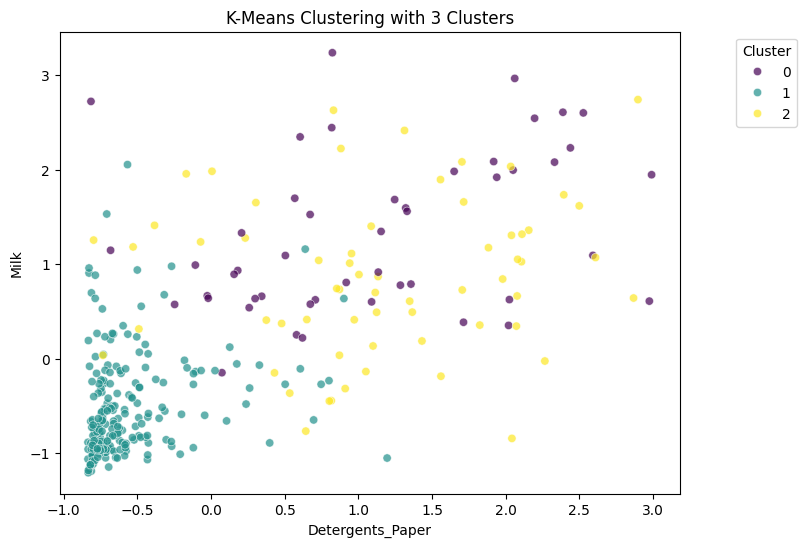

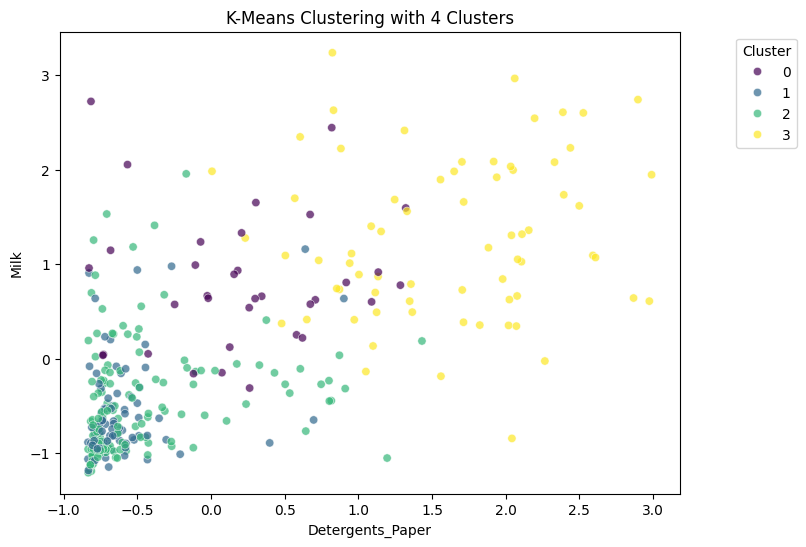

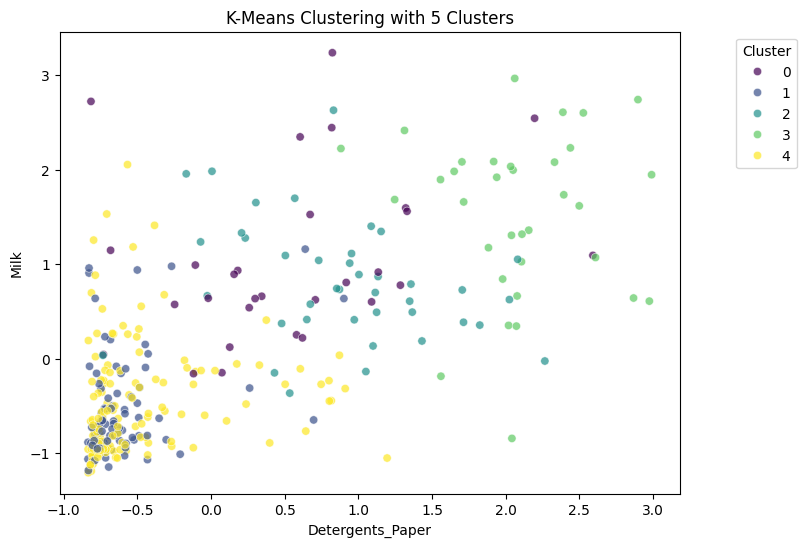

In [99]:
# Your code here:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize K-Means clusters
def visualize_kmeans_clusters(n_clusters, data, x_col, y_col):
    """
    Visualize the K-Means clustering results for a specific number of clusters.

    Parameters:
    - n_clusters: Number of clusters for K-Means
    - data: DataFrame containing the dataset
    - x_col: Name of the column to use for the x-axis
    - y_col: Name of the column to use for the y-axis
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[x_col], y=data[y_col], hue=labels, palette="viridis", alpha=0.7)
    plt.title(f"K-Means Clustering with {n_clusters} Clusters")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title="Cluster", loc="upper right", bbox_to_anchor=(1.2, 1))
    plt.show()

# Iterate over a range of cluster numbers and visualize the results
for n in range(2, 6):  # Experiment with cluster numbers from 2 to 5
    visualize_kmeans_clusters(n_clusters=n, data=customers_scale, x_col="Detergents_Paper", y_col="Milk")


**Your comment here**

**Observations:**
-  With 2 clusters, the data points are broadly separated, but some variability within the groups remains unaccounted for.
-  With 3 clusters, the separation improves significantly, capturing distinct patterns in the data and providing a clearer boundary between clusters.
-  With 4 or more clusters, the distinctions become too granular, leading to potential overfitting and capturing noise rather than meaningful groupings.

The visualization with 3 clusters strikes a balance between simplicity and capturing the underlying structure of the data effectively. Therefore, the number of clusters that seems to work best for K-Means appears to be 3.

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

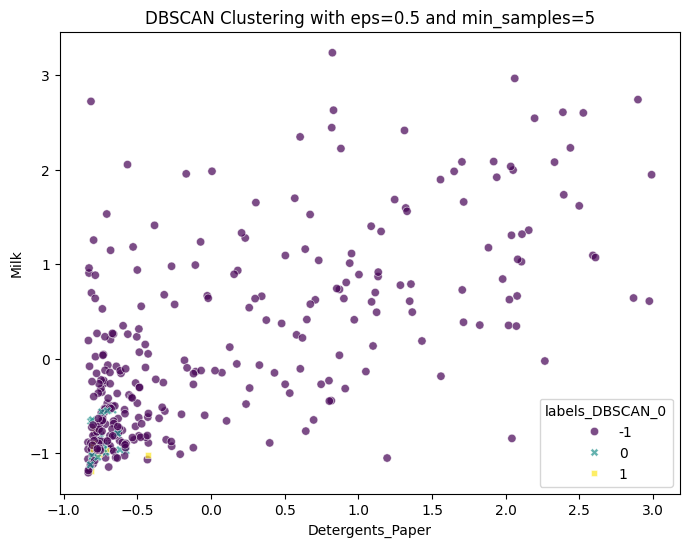

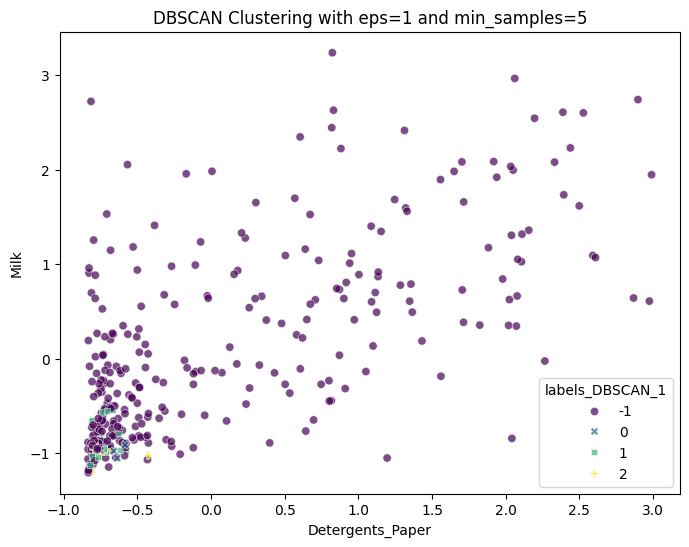

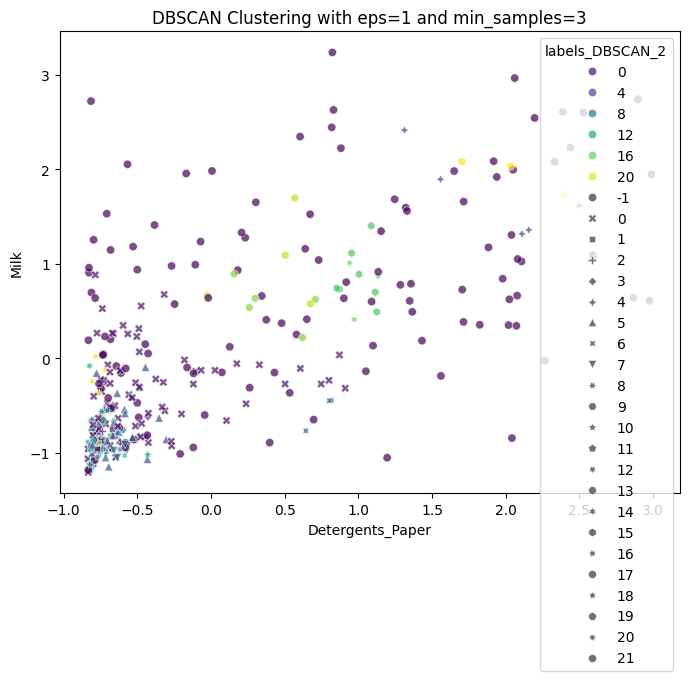

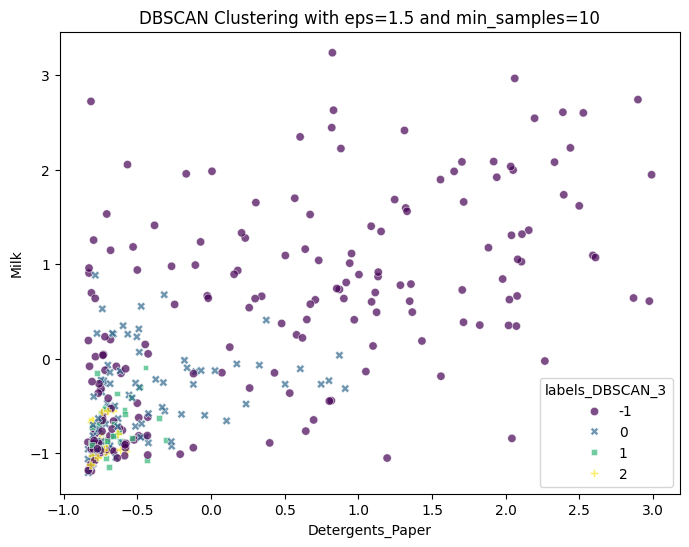

In [104]:
# Your code here
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to visualize clusters
def visualize_dbscan(data, x_col, y_col, labels_col, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=data[x_col],
        y=data[y_col],
        hue=data[labels_col],
        palette="viridis",
        style=data[labels_col],
        alpha=0.7
    )
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title=labels_col, loc='best')
    plt.show()

# Experiment with different eps and min_samples
params = [
    {'eps': 0.5, 'min_samples': 5},
    {'eps': 1, 'min_samples': 5},
    {'eps': 1, 'min_samples': 3},
    {'eps': 1.5, 'min_samples': 10}
]

for i, param in enumerate(params):
    dbscan = DBSCAN(eps=param['eps'], min_samples=param['min_samples'])
    customers_scale[f'labels_DBSCAN_{i}'] = dbscan.fit_predict(customers_scale)
    
    # Visualize results
    visualize_dbscan(
        customers_scale, 
        x_col='Detergents_Paper', 
        y_col='Milk', 
        labels_col=f'labels_DBSCAN_{i}', 
        title=f"DBSCAN Clustering with eps={param['eps']} and min_samples={param['min_samples']}"
    )

**Your comment here**

**Observations:**

1. Default Parameters (eps=0.5, min_samples=5):
- A significant portion of data points were classified as noise (-1 label), suggesting that the density criteria were strict.
- Only a small number of clusters formed, which indicates that the dataset's density may not support many tight clusters under these parameters.
- Analysis for efficiency:
    - High noise (-1 label), with most points not classified into clusters.
    - The strict density threshold captures only the densest parts of the dataset. 
    - Not efficient as it ignores a large portion of the data.

2. Increased Eps (eps=1, min_samples=5):
- Increasing eps allowed more points to be grouped into clusters, reducing the noise level.
- Two additional clusters were identified compared to the default parameters.
- This demonstrates how a larger neighborhood radius can connect more points, forming larger or additional clusters.
- Analysis for efficiency:
    - Noise significantly reduced.
    - Larger clusters formed, covering more points.
    - Cluster boundaries seem reasonable for the dataset.
    - Efficient and balanced, as it captures more points while maintaining meaningful clusters.

3. Reduced min_samples (eps=1, min_samples=3):
- Decreasing the minimum number of samples further reduced noise points and significantly increased the number of clusters.
- Many small clusters appeared, some of which may not have meaningful density patterns, highlighting the risk of setting min_samples too low.
- Analysis for efficiency:
    - Numerous small clusters formed, suggesting overfitting to minor variations.
    - Some clusters may lack meaningful density patterns, leading to fragmented clustering.
    - Not efficient, as it creates many trivial clusters.

4. Higher Eps and min_samples (eps=1.5, min_samples=10):
- A stricter density criterion with higher min_samples led to fewer clusters and more noise points compared to other configurations.
- The formed clusters appeared larger, emphasizing that these parameters favor compact and dense clusters.
- Analysis for efficiency:
    - A more conservative approach with fewer clusters and more noise.
    - Captures only the densest regions while leaving a significant portion as noise.
    - Partially efficient, but it may miss important patterns in the data.

**Summary of Parameter Impact:**
- Increasing eps: Leads to larger clusters or a higher number of clusters because it allows more points to be considered neighbors.
- Reducing min_samples: Increases the number of clusters by reducing the density threshold, but may create overly small and less meaningful clusters.
- Combining High eps with High min_samples: Produces well-defined and compact clusters, though at the cost of classifying more points as noise.

Each parameter combination provides insights into the dataset's density distribution, and the choice depends on the clustering objectives.
For this dataset, a balance between eps and min_samples should be chosen based on domain knowledge or evaluation metrics.

**Conclusion:**
The most efficient configuration is "eps=1 and min_samples=5", as it provides a balance between:
- Reducing noise,
- Forming meaningful clusters,
- And minimizing the risk of overfitting or underfitting.

This configuration ensures the dataset is well-represented without excessive fragmentation or overly restrictive clustering.